# Recommendations Systems
## Course Project

<br>

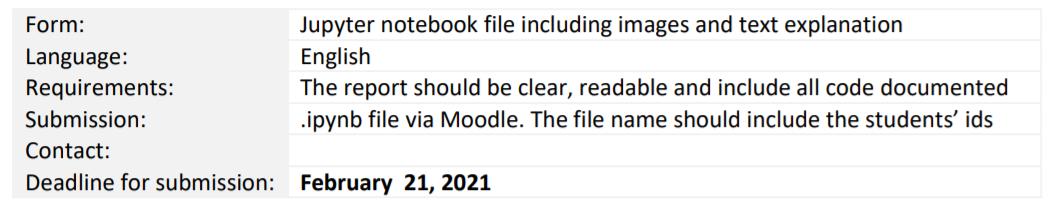

<br>

Each student will submit his\her own assignment.  

Submit your solution in the form of an Jupyter notebook file (with extension ipynb).   
Images of graphs or tables should be submitted as part of the notebook itself.   

The code used to answer the questions should be included, runnable and documented in the notebook.   
Python 3.6 or higher should be used.   

The goal of this project is to let you practice in a data scientist daily work by leveraging recommender
systems algorithms you learnt in the course and customize them in order to solve real business
problems. 

**Submission:** Submission of the project will be done via Moodle by uploading a Jupyter notebook file
containing code, plots and explanations.   
The homework needs to be entirely in English. The deadline for submission of Homework 1 is set to February 21, 2021 end of day Israel.

We will use a dataset based on the <a href='https://grouplens.org/datasets/movielens/1m/'>MovieLens 1M rating dataset</a> after some pre-processing to adapt it to an implicit feedback use case scenario. You can download the dataset used by <a href='https://github.com/hexiangnan/neural_collaborative_filtering'>this implementation</a> of the paper <a href='https://arxiv.org/abs/1708.05031'>Neural Collaborative Filtering</a> or from the <a href='https://colab.research.google.com/drive/19MHT7ewRv8TfX7eheGeLCys5mRa7neCK?usp=sharing'>NeuralCollaborativeFiltering_implicit</a> notebook in Moodle.

<br><br><br>
<br><br><br>
<br><br><br>

**Imports**

In [7]:
# General
import os  
import sys
import time
import warnings
import multiprocessing

# Data Science
import numpy  as np
import scipy  as sp
import pandas as pd

# Visual
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Notebook
from IPython.display import display, HTML

# Deep
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import initializers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Dense,Lambda,Activation
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax
from tensorflow.keras.models import Sequential,Model,load_model,save_model
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Embedding,Input,Dense,Reshape,Flatten,Dropout,Multiply,Concatenate

<br>  

**Hide Warnings**

In [8]:
warnings.filterwarnings('ignore')

<br>

**Disable Autoscrolling**

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

<br>

**Colab**

In [12]:
# from google.colab import drive  


data_dir = os.getcwd() + 'data/'
# drive.mount(r'/content/drive/',force_remount=True) 
# data_dir = os.getcwd() + '/drive/My Drive/Colab Notebooks/Recsys/data/'

<br><br><br>
<br><br><br>
<br><br><br>

## Question 1: Matrix Factorization with custom loss (35 points)
<br><br>

You work for an e-commerce company “Buy Here”.   
You are using the Matrix Factorization algorithm to recommend consumers with products which may be relevant to them using implicit feedback.   
The product manager tells you that he wants to improve the accuracy of the prediction model for more expensive products since these products are more profitable to the company.  


One of the common techniques to be more accurate for more expensive products is to give a higher weight in the loss function to more expensive products.   
You are using the Binary Cross Entropy loss function which is suitable for binary classification problems. 
Here is the custom loss function, when adding a weight to each instance in the training data, to give different weight for each sample.  


$L = -\frac{1}{N} \sum_{(i,j) \in S}^{N} \alpha_j \Bigg ( y_{i,j} log \bigg ( \sigma(\mu + p_i + o_j + u^{T}_{i}v_j) \bigg ) + \big ( 1-y_{i,j} \big ) log \bigg ( 1- \sigma \big ( \mu + p_i + o_j + u^{T}_{i}v_j \big ) \bigg ) \Bigg )$


- $𝛼_𝑗$ is the weight for instances which involve item j, 
- 𝜎(𝑧) = $\frac{1}{1+ 𝑒^{−𝑧}}$ is the logistic function
- 𝜇 is the global bias
- $𝑝_𝑖$ , $𝑜_𝑗$ are the user and item bias respectively 
- $𝒖_𝒊$ , $𝒗_𝒋$ are column vectors with size K, representing the latent weight vector of the user i and item j respectively 
- N is the number of instances in the training dataset.

<br><br><br>

**a. Derive the Gradient Decent update rule for the user and item latent vector weights as well as for
the global bias, user bias and item bias variables. Explain each step. (30 points)**


<br><br>

**b. Given the prices of the different items from the catalog. How will you set the weights for each
training instance based on the item price. You can offer more than one alternative. Explain your
suggestion, and the advantage of each choice. (5 points)**

<br><br><br>
<br><br><br>
<br><br><br>

## Question 2: Neural Collaborative filtering implementation (50 points)

<br><br>

For this question, you will use the <a href='https://drive.google.com/file/d/1--6vYsFLsW0s--I7ktRyjMy2LGEgqgX6/view'>item_price.csv</a> file and the original dataset, implement and evaluate a
price sensitive recommender system

**a. Use the item_price.csv file to get the prices of each item. Explore the price distribution of items.
(5 points)**

<br><br>

**b. To evaluate the performance of the price sensitive model we will add another metric Revenue@K which will measure the overall revenue from the top 5 recommended hits. Implement the metric. (5 points)**

The function will be calculated as follows:  

    For each user: sum the prices of the top K recommended items which were rated as the revenue from the user.  
    Calculate the mean revenue from all users.


<br><br>

**c. Suggest a metric of your own which will incorporate both the ranking of the recommended items as well as its price.   
Explain why this metric is suitable and demonstrate it as part of the evaluation in point e below. (10 points)**


<br><br>

**d. Select one of the models presented in the Neural Collaborative Filtering paper and incorporate the movie price to the loss function as part of training. (10 points)**

<br><br>

**e. Compare the results of the original model and the one with the customized loss across the four metrics: (20 points)** 

        - MRR@5
        - NDCG@5
        - Revenue@5 
        - your custom metric

<br>

- Compare between different heuristics of item price to weights mapping. 

<br>

- Present the comparison results, discuss the results and the trade-offs and optimize. 

<br>

- Verify and present that the learning is ‘healthy’ (no overfitting, no under-fitting and that the results make sense). 

<br><br><br>
<br><br><br>
<br><br><br>

## Question 3: Hybrid recommender systems (15 points)

<br><br>

Cold start or users\items with a small number of interactions is a very common scenario in real world.   
In this question you will plan how you can leverage content based features to handle the cold start scenario. 

**a. Take a look at the original MovieLens 1M dataset.   
Which user and movie features could you use to enhance your recommender system and provide effective recommendations to users or items with a small number of ratings. (5 points)**

<br><br>

**b. Describe a neural network based model to incorporate user or movie related features to the recommender system.   
Explain your suggestion. (there is no need to implement, provide pseudocode\visual). (5 points)**

<br><br>

**c. How will you incorporate movie genres into the recommender system? How will you handle movies which belong to multiple genres?    
Explain the challenge and the proposed solution (there is no need to implement, provide pseudo-code). (5 points)**

<br><br><br>
<br><br><br>
<br><br><br>

<br><br><br>
<br><br><br>

Good luck